In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
test_partition_size = 0.2
folder = 'data-exe-tec/'

In [89]:
df_exe = pd.read_csv('exe.csv')
df_tec = pd.read_csv('tec.csv')

In [90]:
df_exe.head()

,name,daily,weekly,monthly,yearly,1_year,3_year
0,Apple,-1.38,-1.30,-6.20,-5.12,38.24,172.49
1,Microsoft,0.24,-0.88,-5.58,11.12,16.98,154.20
2,Amazon.com,-1.19,-0.01,-3.73,-0.93,15.30,104.38
3,Alphabet A,-0.23,1.36,0.35,32.67,42.27,116.40
4,Alphabet C,-1.08,0.99,0.83,34.50,44.15,119.01


In [91]:
df_tec.head()

,name,15_min,hour,day,week,month
0,Apple,Venta fuerte,Venta fuerte,Venta fuerte,Venta,Compra fuerte
1,Microsoft,Venta fuerte,Neutral,Neutral,Neutral,Compra fuerte
2,Amazon.com,Venta fuerte,Venta fuerte,Venta fuerte,Venta,Compra fuerte
3,Alphabet A,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte
4,Alphabet C,Venta fuerte,Venta,Compra,Compra fuerte,Compra fuerte


In [92]:
df_exe.shape

(593, 7)

In [93]:
df_tec.shape

(593, 6)

In [94]:
# df_pre = pd.concat([df_exe, df_tec], ignore_index=True)
df_pre = pd.merge(df_exe, df_tec, on='name', how='right')

In [95]:
df_pre.to_csv('exe-tec.csv', index=False)

In [96]:
df_pre

,name,daily,weekly,monthly,yearly,1_year,3_year,15_min,hour,day,week,month
0,Apple,-1.38,-1.30,-6.20,-5.12,38.24,172.49,Venta fuerte,Venta fuerte,Venta fuerte,Venta,Compra fuerte
1,Microsoft,0.24,-0.88,-5.58,11.12,16.98,154.20,Venta fuerte,Neutral,Neutral,Neutral,Compra fuerte
2,Amazon.com,-1.19,-0.01,-3.73,-0.93,15.30,104.38,Venta fuerte,Venta fuerte,Venta fuerte,Venta,Compra fuerte
3,Alphabet A,-0.23,1.36,0.35,32.67,42.27,116.40,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte
4,Alphabet C,-1.08,0.99,0.83,34.50,44.15,119.01,Venta fuerte,Venta,Compra,Compra fuerte,Compra fuerte
...,...,...,...,...,...,...,...,...,...,...,...,...
588,Gbm Valores De Deuda Sa De Cv Siid,0.01,0.02,0.12,0.78,2.70,15.93,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte,Compra fuerte
589,Santander Plus De Corto Plazo Sa,0.00,0.00,0.00,0.00,0.00,5.79,NaN,NaN,NaN,NaN,NaN
590,Peloton Interactive,2.99,6.47,1.19,-32.53,95.58,NaN,Compra fuerte,Compra fuerte,Compra,Venta,Compra fuerte
591,Jumia Tech,0.97,19.25,-8.64,-34.91,NaN,NaN,Compra fuerte,Compra fuerte,Neutral,Venta fuerte,Neutral


In [97]:
df_pre = df_pre.drop(['1_year', '3_year', '15_min', 'hour'], axis=1)
df_pre

,name,daily,weekly,monthly,yearly,day,week,month
0,Apple,-1.38,-1.30,-6.20,-5.12,Venta fuerte,Venta,Compra fuerte
1,Microsoft,0.24,-0.88,-5.58,11.12,Neutral,Neutral,Compra fuerte
2,Amazon.com,-1.19,-0.01,-3.73,-0.93,Venta fuerte,Venta,Compra fuerte
3,Alphabet A,-0.23,1.36,0.35,32.67,Compra fuerte,Compra fuerte,Compra fuerte
4,Alphabet C,-1.08,0.99,0.83,34.50,Compra,Compra fuerte,Compra fuerte
...,...,...,...,...,...,...,...,...
588,Gbm Valores De Deuda Sa De Cv Siid,0.01,0.02,0.12,0.78,Compra fuerte,Compra fuerte,Compra fuerte
589,Santander Plus De Corto Plazo Sa,0.00,0.00,0.00,0.00,NaN,NaN,NaN
590,Peloton Interactive,2.99,6.47,1.19,-32.53,Compra,Venta,Compra fuerte
591,Jumia Tech,0.97,19.25,-8.64,-34.91,Neutral,Venta fuerte,Neutral


In [121]:
df_pre[df_pre['month'] == 'Compra fuerte']['month'] = 'Compra'
df_pre[df_pre['month'] == 'Venta fuerte']['month'] = 'Venta'

In [122]:
df_pre = df_pre.dropna()
df_pre

,name,daily,weekly,monthly,yearly,day,week,month
0,Apple,-1.38,-1.30,-6.20,-5.12,Venta fuerte,Venta,Compra
1,Microsoft,0.24,-0.88,-5.58,11.12,Neutral,Neutral,Compra
2,Amazon.com,-1.19,-0.01,-3.73,-0.93,Venta fuerte,Venta,Compra
3,Alphabet A,-0.23,1.36,0.35,32.67,Compra fuerte,Compra fuerte,Compra
4,Alphabet C,-1.08,0.99,0.83,34.50,Compra,Compra fuerte,Compra
...,...,...,...,...,...,...,...,...
586,Afircor Sa De Cv Sirv B,0.18,-0.13,1.56,16.17,Neutral,Compra fuerte,Compra
588,Gbm Valores De Deuda Sa De Cv Siid,0.01,0.02,0.12,0.78,Compra fuerte,Compra fuerte,Compra
590,Peloton Interactive,2.99,6.47,1.19,-32.53,Compra,Venta,Compra
591,Jumia Tech,0.97,19.25,-8.64,-34.91,Neutral,Venta fuerte,Neutral


In [123]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 592
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     508 non-null    object 
 1   daily    508 non-null    float64
 2   weekly   508 non-null    float64
 3   monthly  508 non-null    float64
 4   yearly   508 non-null    float64
 5   day      508 non-null    object 
 6   week     508 non-null    object 
 7   month    508 non-null    object 
dtypes: float64(4), object(4)
memory usage: 35.7+ KB


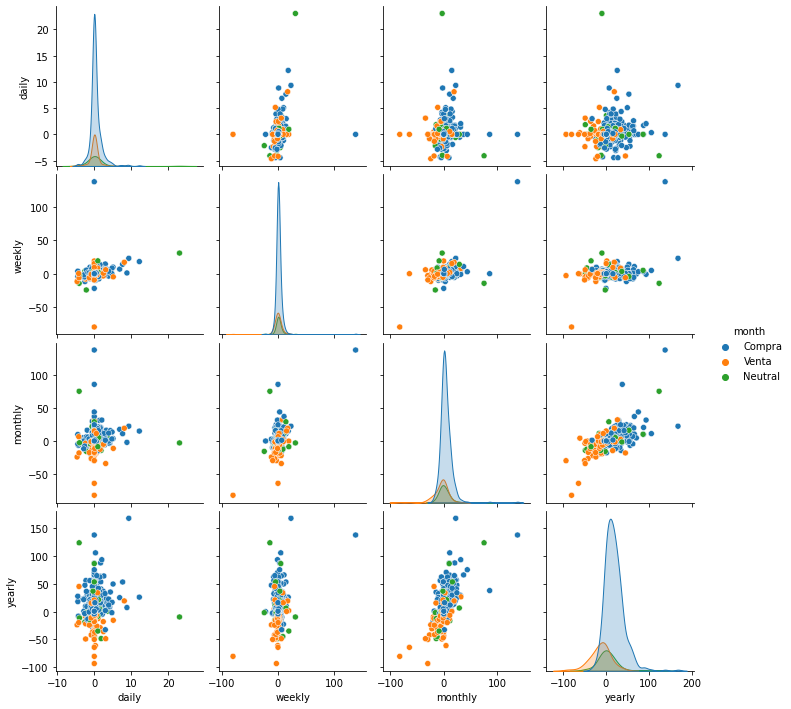

In [124]:
sns.pairplot(df_pre, hue="month")

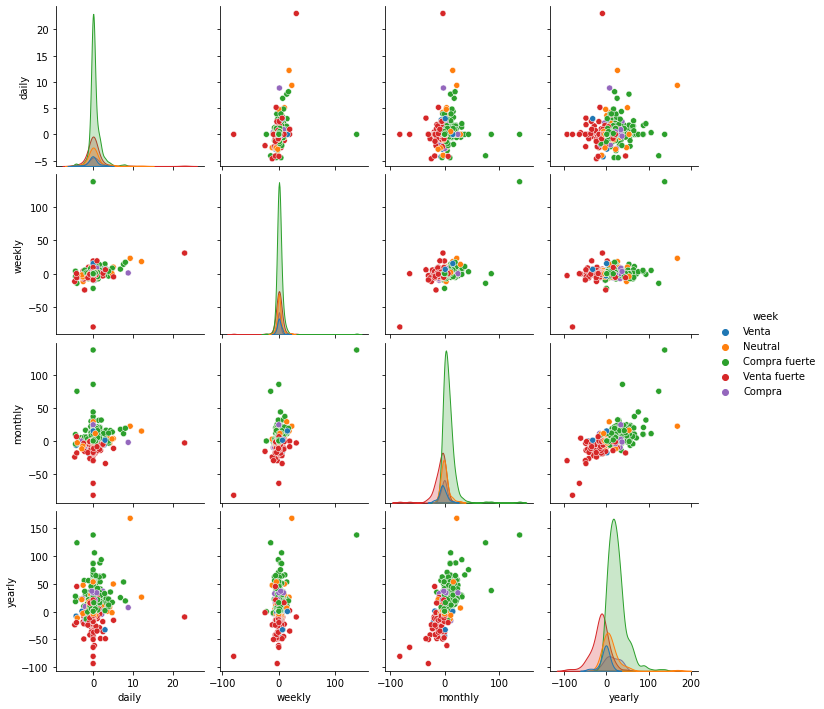

In [64]:
sns.pairplot(df_pre, hue="week")

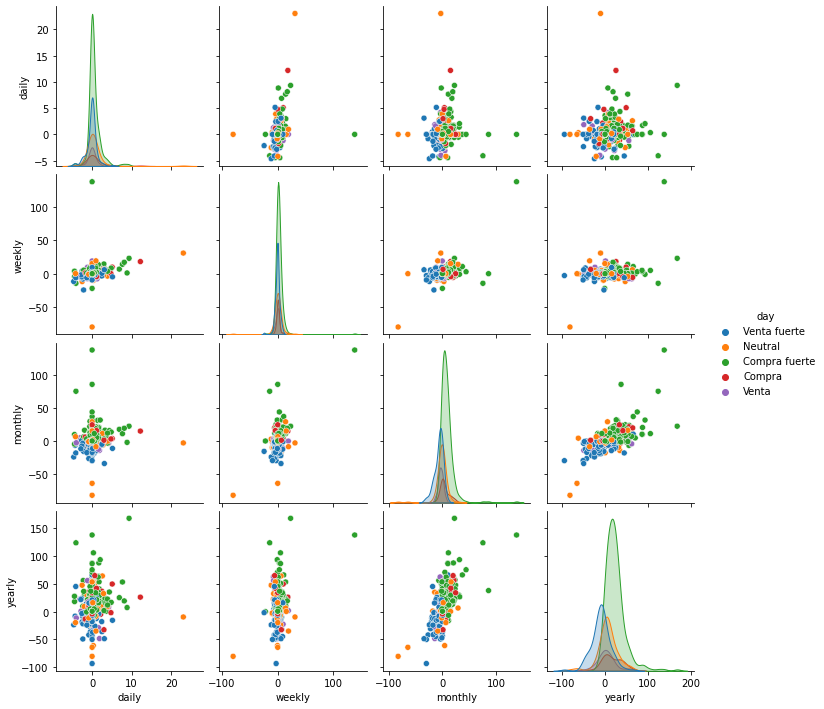

In [65]:
sns.pairplot(df_pre, hue="day")

<AxesSubplot:>

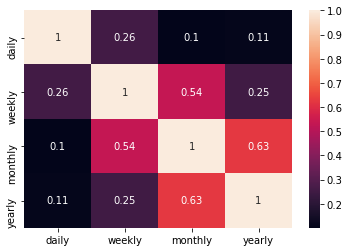

In [125]:
sns.heatmap(df_pre.corr(), annot = True)

In [126]:
df_pre.corr()

,daily,weekly,monthly,yearly
daily,1.000000,0.255884,0.100914,0.110446
weekly,0.255884,1.000000,0.536185,0.252792
monthly,0.100914,0.536185,1.000000,0.626233
yearly,0.110446,0.252792,0.626233,1.000000


# Estadarización de datos

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()
scaler.fit(df_pre.drop(['name','day','week','month'], axis=1))

StandardScaler()

In [129]:
scaled_features = scaler.transform(df_pre.drop(['name','day','week','month'], axis=1))
scaled_features

array([[-0.90628761, -0.25939206, -0.61976481, -0.64847956],
       [-0.03376804, -0.20932159, -0.57245445, -0.02828203],
       [-0.80395507, -0.10560419, -0.43128644, -0.48846554],
       ...,
       [ 1.44736086,  0.66691161, -0.05585585, -1.69525383],
       [ 0.35940436,  2.19048443, -0.80595396, -1.78614485],
       [ 1.50122009,  0.59299806, -2.75407247, -2.31086862]])

In [130]:
# Se renombran las columnas
df_features = pd.DataFrame(scaled_features, columns=['diario','semanal','mensual','anual'])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   diario   508 non-null    float64
 1   semanal  508 non-null    float64
 2   mensual  508 non-null    float64
 3   anual    508 non-null    float64
dtypes: float64(4)
memory usage: 16.0 KB


In [131]:
# Partición de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_features, df_pre['month'], test_size=test_partition_size, random_state=101)

In [132]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [133]:
gpc_kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel=gpc_kernel, random_state=101)
gpc_model.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=101)

In [134]:
y_pred = gpc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Compra       0.83      0.93      0.88        80
     Neutral       0.00      0.00      0.00         7
       Venta       0.46      0.40      0.43        15

    accuracy                           0.78       102
   macro avg       0.43      0.44      0.43       102
weighted avg       0.72      0.78      0.75       102



/home/abel/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


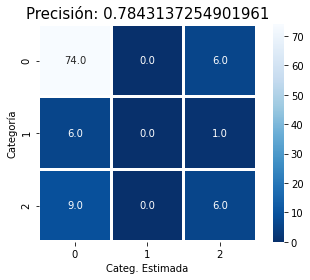

In [135]:
cm = confusion_matrix(y_test, y_pred)
score = gpc_model.score(X_test, y_test)

sns.heatmap(cm, annot=True, fmt=".1f", linewidths=2, square = True, cmap = 'Blues_r');
plt.ylabel('Categoría');
plt.xlabel('Categ. Estimada');
all_sample_title = 'Precisión: {0}'.format(score)
plt.title(all_sample_title, size = 15);